# 라이브러리 및 데이터 가져오기

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)

In [ ]:
# data구조 전처리 함수 정의

# 컬럼 길이(연도 컬럼 제외)만큼 각 연도를 반복하는 DataFrame 반환 함수
def years_n(df):
    y = []
    cols = df.iloc[:,1:].columns.to_list() # 연도를 뺀 컬럼명들을 list로 만듦
    
    for i in range(len(df)):
        l = []
        for j in range(len(cols)):
            l.append(df['연도'][i])
        y.append(l)
        
    years_array = np.array(y)
    years_array = years_array.reshape(-1,1)
    year_df = pd.DataFrame(years_array, columns=['연도'])
    
    return(year_df)


# 값을 (-1,1)형태로 정렬하여 DataFrame으로 반환하는 함수
def vals(df, col_name):
    val_df = pd.DataFrame(df.iloc[:,1:].values.reshape(-1,1), columns=[col_name])
    
    return val_df


# 연도마다 각 국가명이 들어가는 df생성 함수 선언
def contries(df):
    cons = []
    for i in range(len(df)):
        cons.append(df.iloc[:,1:].columns.to_list())
    
    cons_array = np.array(cons)
    cons_array = cons_array.reshape(-1,1)
    cons_df = pd.DataFrame(cons_array, columns=['국가'])
    
    return cons_df


# 함수 합치기
def resh(df, col_name):
    df1 = years_n(df)
    df2 = contries(df)
    df3 = vals(df, col_name)
    
    result_df = pd.concat([df1, df2, df3], axis=1)
    
    return result_df

## <출생> :: birth_df

In [ ]:
birth_df = pd.read_csv('./data2/시군구_성_월별_출생.csv', encoding='cp949')
birth_df.head(3)

,시점,전국
0,2000.01,61644
1,2000.02,56723
2,2000.03,59878


In [ ]:
birth_df = birth_df.rename(columns={'시점':'월별', '전국':'출생'})
birth_df

,월별,출생
0,2000.01,61644
1,2000.02,56723
2,2000.03,59878
3,2000.04,53058
4,2000.05,52492
5,2000.06,46774
6,2000.07,48377
7,2000.08,50623
8,2000.09,52913
9,2000.10,54429


In [ ]:
birth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월별      264 non-null    float64
 1   출생      264 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


## <혼인> :: marry_df

In [ ]:
marry_df = pd.read_csv('./data2/시도_시군구_월별_혼인.csv', encoding='cp949')
marry_df.head(3)

,시점,전국
0,2000.01,30120
1,2000.02,26187
2,2000.03,30418


In [ ]:
marry_df = marry_df.rename(columns={'시점':'월별', '전국':'혼인'})
marry_df

,월별,혼인
0,2000.01,30120
1,2000.02,26187
2,2000.03,30418
3,2000.04,28179
4,2000.05,35330
5,2000.06,29029
6,2000.07,20488
7,2000.08,18780
8,2000.09,15844
9,2000.10,26823


In [ ]:
marry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월별      264 non-null    float64
 1   혼인      264 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


## <취업> :: emp_df

In [ ]:
emp_df = pd.read_csv('./data2/취업시간별_취업자.csv', encoding='cp949')
emp_df.head(3)

,시점,계 (천명)
0,2000.01,20210
1,2000.02,20235
2,2000.03,20696


In [ ]:
emp_df = emp_df.rename(columns={'시점':'월별', '계 (천명)':'취업'})
emp_df=emp_df[:264]
emp_df

,월별,취업
0,2000.01,20210
1,2000.02,20235
2,2000.03,20696
3,2000.04,21115
4,2000.05,21420
5,2000.06,21476
6,2000.07,21616
7,2000.08,21380
8,2000.09,21561
9,2000.10,21731


In [ ]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월별      264 non-null    float64
 1   취업      264 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


## <성별간_경제활동인구수_차이> :: act_df

In [ ]:
act_df = pd.read_csv('./data2/성_연령별_경제활동인구.csv', encoding='cp949')
act_df.head(3)

,시점,남자,여자
0,2000.01,12806,8636
1,2000.02,12769,8689
2,2000.03,12909,8901


In [ ]:
act_df = act_df[:264]
act_df = act_df.rename(columns={'시점':'월별'})
act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월별      264 non-null    float64
 1   남자      264 non-null    int64  
 2   여자      264 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.3 KB


In [ ]:
act_df['성별간_경제활동인구수_차이'] = act_df['남자']-act_df['여자']
act_df.drop(['남자','여자'],axis=1, inplace=True)
act_df

,월별,성별간_경제활동인구수_차이
0,2000.01,4170
1,2000.02,4080
2,2000.03,4008
3,2000.04,3946
4,2000.05,3837
5,2000.06,3804
6,2000.07,3893
7,2000.08,3940
8,2000.09,3824
9,2000.10,3835


In [ ]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   월별              264 non-null    float64
 1   성별간_경제활동인구수_차이  264 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


## <소비자물가_등락지수> :: cp_df

In [ ]:
cp_df = pd.read_csv('./data2/월별_소비자물가_등락률.csv', encoding='cp949')
cp_df.head(3)

,시점,총지수
0,2000.01,0.4
1,2000.02,0.3
2,2000.03,0.5


In [ ]:
cp_df = cp_df[:264]
cp_df = cp_df.rename(columns={'시점':'월별','총지수':'소비자물가_등락지수'})
cp_df

,월별,소비자물가_등락지수
0,2000.01,0.4
1,2000.02,0.3
2,2000.03,0.5
3,2000.04,-0.4
4,2000.05,-0.5
5,2000.06,0.5
6,2000.07,0.4
7,2000.08,0.5
8,2000.09,1.3
9,2000.10,-0.1


In [ ]:
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   월별          264 non-null    float64
 1   소비자물가_등락지수  264 non-null    float64
dtypes: float64(2)
memory usage: 4.2 KB


## <남녀고용률차> :: emp_dif_df

In [ ]:
emp_dif_df = pd.read_csv('./data2/고용률_시도.csv', encoding='cp949')
emp_dif_df.head(3)

,시점,남자,여자,고용률차
0,2000.01,68.9,44.3,24.6
1,2000.02,68.6,44.5,24.1
2,2000.03,70.0,45.6,24.4


In [ ]:
emp_dif_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      274 non-null    float64
 1   남자      274 non-null    float64
 2   여자      274 non-null    float64
 3   고용률차    274 non-null    float64
dtypes: float64(4)
memory usage: 8.7 KB


In [ ]:
emp_dif_df = emp_dif_df[:264]
emp_dif_df = emp_dif_df.rename(columns={'시점':'월별'})
emp_dif_df.drop(['남자','여자'],axis=1,inplace=True)
emp_dif_df

,월별,고용률차
0,2000.01,24.6
1,2000.02,24.1
2,2000.03,24.4
3,2000.04,23.8
4,2000.05,23.5
5,2000.06,23.3
6,2000.07,23.6
7,2000.08,23.8
8,2000.09,23.3
9,2000.10,23.3


In [ ]:
emp_dif_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월별      264 non-null    float64
 1   고용률차    264 non-null    float64
dtypes: float64(2)
memory usage: 4.2 KB


## <조출생률> :: eb_df

In [ ]:
eb_df = pd.read_csv('./data2/월.분기.연간_인구동향_출생_사망_혼인_이혼.csv', encoding='cp949')
eb_df.head(3)

,시점,조출생률(천명당)
0,2000.01,15.4
1,2000.02,15.1
2,2000.03,14.9


In [ ]:
eb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시점         264 non-null    float64
 1   조출생률(천명당)  264 non-null    float64
dtypes: float64(2)
memory usage: 4.2 KB


In [ ]:
eb_df = eb_df.rename(columns={'시점':'월별'})
eb_df

,월별,조출생률(천명당)
0,2000.01,15.4
1,2000.02,15.1
2,2000.03,14.9
3,2000.04,13.6
4,2000.05,13.0
5,2000.06,12.0
6,2000.07,12.0
7,2000.08,12.6
8,2000.09,13.6
9,2000.10,13.5


In [ ]:
eb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   월별         264 non-null    float64
 1   조출생률(천명당)  264 non-null    float64
dtypes: float64(2)
memory usage: 4.2 KB


# merge

* <출생> :: birth_df
* <혼인> :: marry_df
* <취업자> :: emp_df
* <경제활동인구> :: act_df
* <소비자물가_등락지수> :: cp_df
* <고용률> :: emp_dif_df
* <조출생률> :: eb_df

In [ ]:
dfs = [birth_df, marry_df, emp_df, act_df, cp_df, emp_dif_df, eb_df]

In [ ]:
origin_df=birth_df[['월별']]

for df in dfs:
    result_df = pd.merge(origin_df, df, how='outer', on='월별')
    origin_df=result_df

In [ ]:
origin_df

,월별,출생,혼인,취업,성별간_경제활동인구수_차이,소비자물가_등락지수,고용률차,조출생률(천명당)
0,2000.01,61644,30120,20210,4170,0.4,24.6,15.4
1,2000.02,56723,26187,20235,4080,0.3,24.1,15.1
2,2000.03,59878,30418,20696,4008,0.5,24.4,14.9
3,2000.04,53058,28179,21115,3946,-0.4,23.8,13.6
4,2000.05,52492,35330,21420,3837,-0.5,23.5,13.0
5,2000.06,46774,29029,21476,3804,0.5,23.3,12.0
6,2000.07,48377,20488,21616,3893,0.4,23.6,12.0
7,2000.08,50623,18780,21380,3940,0.5,23.8,12.6
8,2000.09,52913,15844,21561,3824,1.3,23.3,13.6
9,2000.10,54429,26823,21731,3835,-0.1,23.3,13.5


In [ ]:
merge_df = origin_df.iloc[:,1:]
merge_df

,출생,혼인,취업,성별간_경제활동인구수_차이,소비자물가_등락지수,고용률차,조출생률(천명당)
0,61644,30120,20210,4170,0.4,24.6,15.4
1,56723,26187,20235,4080,0.3,24.1,15.1
2,59878,30418,20696,4008,0.5,24.4,14.9
3,53058,28179,21115,3946,-0.4,23.8,13.6
4,52492,35330,21420,3837,-0.5,23.5,13.0
5,46774,29029,21476,3804,0.5,23.3,12.0
6,48377,20488,21616,3893,0.4,23.6,12.0
7,50623,18780,21380,3940,0.5,23.8,12.6
8,52913,15844,21561,3824,1.3,23.3,13.6
9,54429,26823,21731,3835,-0.1,23.3,13.5


In [ ]:
corr = merge_df.corr(method='pearson')
corr

,출생,혼인,취업,성별간_경제활동인구수_차이,소비자물가_등락지수,고용률차,조출생률(천명당)
출생,1.000000,0.422387,-0.830880,0.076319,0.225616,0.827787,0.989099
혼인,0.422387,1.000000,-0.426798,0.286112,-0.068651,0.522408,0.392713
취업,-0.830880,-0.426798,1.000000,0.173082,-0.251378,-0.906246,-0.869824
성별간_경제활동인구수_차이,0.076319,0.286112,0.173082,1.000000,0.087341,0.150551,0.022052
소비자물가_등락지수,0.225616,-0.068651,-0.251378,0.087341,1.000000,0.209554,0.225885
고용률차,0.827787,0.522408,-0.906246,0.150551,0.209554,1.000000,0.843179
조출생률(천명당),0.989099,0.392713,-0.869824,0.022052,0.225885,0.843179,1.000000


In [ ]:
#글자깨짐 방지
plt.rc("font", family = "Malgun Gothic")
sns.set(font="HYGothic-Extra", 
rc={"axes.unicode_minus":False}, style='white')

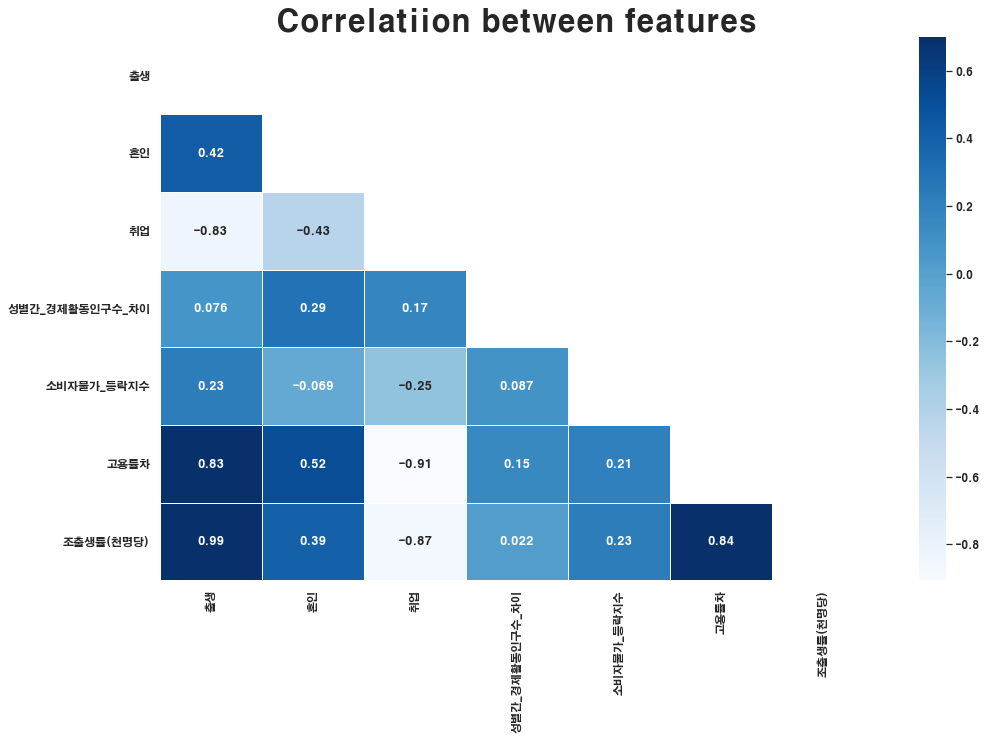

In [ ]:
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(corr))
sns.heatmap(data=corr, linewidths=1, annot=True, cmap='Blues', mask=mask, vmax=0.7)
plt.title('Correlatiion between features', fontsize=30)
plt.rc('xtick', labelsize=15) 
plt.rc('axes', labelsize=15)
plt.show()